In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nb
from sklearn.linear_model import LinearRegression


### Data pre-processing

In [66]:
df = pd.read_csv("FPT Historical Data_3.csv")

In [67]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/17/2024,"128,800.0","131,000.0","131,400.0","128,500.0",4.87M,-1.68%
1,06/14/2024,"131,000.0","130,100.0","132,600.0","129,000.0",6.41M,0.77%
2,06/13/2024,"130,000.0","133,700.0","133,800.0","130,000.0",8.14M,-1.52%
3,06/12/2024,"132,000.0","127,900.0","132,700.0","127,800.0",11.22M,-9.90%
4,06/11/2024,"146,500.0","144,300.0","146,500.0","143,100.0",6.33M,1.74%


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      350 non-null    object
 1   Price     350 non-null    object
 2   Open      350 non-null    object
 3   High      350 non-null    object
 4   Low       350 non-null    object
 5   Vol.      350 non-null    object
 6   Change %  350 non-null    object
dtypes: object(7)
memory usage: 19.3+ KB


In [69]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,350,350,350,350,350,350,350
unique,350,241,233,240,232,268,219
top,06/17/2024,"68,499.0","67,308.0","68,499.0","95,300.0",1.09M,0.00%
freq,1,7,6,6,6,5,23


In [70]:
# Normalize the price, Open, High, Low
df.Price = df.Price.str.replace(',', '').astype(float)
df.Open = df.Open.str.replace(',', '').astype(float)
df.High = df.High.str.replace(',', '').astype(float)
df.Low = df.Low.str.replace(',', '').astype(float)


In [71]:
input_string = "4.79M"
input_string[0:-1]

'4.79'

In [72]:
def vol_replace(string_input):
    if string_input[-1] == "M":
        output = float(string_input[0:-1])*1000000
    elif string_input[-1] == "K":
        output = float(string_input[0:-1])*1000
    else:
        output = float(string_input)
    return output

df["Vol."] = df["Vol."].apply(vol_replace)

In [73]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/17/2024,128800.0,131000.0,131400.0,128500.0,4870000.0,-1.68%
1,06/14/2024,131000.0,130100.0,132600.0,129000.0,6410000.0,0.77%
2,06/13/2024,130000.0,133700.0,133800.0,130000.0,8140000.0,-1.52%
3,06/12/2024,132000.0,127900.0,132700.0,127800.0,11220000.0,-9.90%
4,06/11/2024,146500.0,144300.0,146500.0,143100.0,6330000.0,1.74%


In [74]:
df['Date'] = pd.to_datetime(df['Date'])

In [75]:
df["Change %"] = df["Change %"].str.replace('%', '').astype(float)/100

In [76]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-17,128800.0,131000.0,131400.0,128500.0,4870000.0,-0.0168
1,2024-06-14,131000.0,130100.0,132600.0,129000.0,6410000.0,0.0077
2,2024-06-13,130000.0,133700.0,133800.0,130000.0,8140000.0,-0.0152
3,2024-06-12,132000.0,127900.0,132700.0,127800.0,11220000.0,-0.0990
4,2024-06-11,146500.0,144300.0,146500.0,143100.0,6330000.0,0.0174


In [77]:
df = df.sort_values('Date', ascending=True).reset_index()

# Moving Average

## Simple Moving Average

Formula:

SMAj = (1/k) * ∑ (i=j-1 to j+k-1)Ai        

where,

SMAj = Simple Moving Average of jth window \
k = size of the window \
Ai = ith element of the set of observations 

In [78]:
def SMA(window_size, df_column):
    moving_average = df_column.rolling(window=window_size+1).mean()
    return moving_average

In [79]:
ma = SMA(4, df.Price)

In [80]:
ma

0           NaN
1           NaN
2           NaN
3           NaN
4       70966.8
         ...   
345    142440.0
346    140820.0
347    138900.0
348    136700.0
349    133660.0
Name: Price, Length: 350, dtype: float64

In [81]:
# New colum SMA
df["SMA"] = ma

In [82]:
index = df.index.to_frame()
index[0]

0        0
1        1
2        2
3        3
4        4
      ... 
345    345
346    346
347    347
348    348
349    349
Name: 0, Length: 350, dtype: int64

In [83]:
df.head()

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA
0,349,2023-01-17,69776.0,69095.0,69776.0,68925.0,1120000.0,0.0149,NaN
1,348,2023-01-18,70967.0,69861.0,70967.0,69605.0,1100000.0,0.0171,NaN
2,347,2023-01-19,71392.0,70626.0,71648.0,70541.0,1530000.0,0.0060,NaN
3,346,2023-01-27,71477.0,71562.0,72754.0,71477.0,1310000.0,0.0012,NaN
4,345,2023-01-30,71222.0,71648.0,71818.0,71222.0,1020000.0,-0.0036,70966.8


In [84]:
df = df.fillna(0)

In [85]:
df

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA
0,349,2023-01-17,69776.0,69095.0,69776.0,68925.0,1120000.0,0.0149,0.0
1,348,2023-01-18,70967.0,69861.0,70967.0,69605.0,1100000.0,0.0171,0.0
2,347,2023-01-19,71392.0,70626.0,71648.0,70541.0,1530000.0,0.0060,0.0
3,346,2023-01-27,71477.0,71562.0,72754.0,71477.0,1310000.0,0.0012,0.0
4,345,2023-01-30,71222.0,71648.0,71818.0,71222.0,1020000.0,-0.0036,70966.8
...,...,...,...,...,...,...,...,...,...
345,4,2024-06-11,146500.0,144300.0,146500.0,143100.0,6330000.0,0.0174,142440.0
346,3,2024-06-12,132000.0,127900.0,132700.0,127800.0,11220000.0,-0.0990,140820.0
347,2,2024-06-13,130000.0,133700.0,133800.0,130000.0,8140000.0,-0.0152,138900.0
348,1,2024-06-14,131000.0,130100.0,132600.0,129000.0,6410000.0,0.0077,136700.0


In [86]:
# MAPE
mape_df = abs(df["Price"] - df["SMA"])/df["Price"]
mape = mape_df.mean()*100

In [87]:
mape

2.310300160300232

# Visualize 02 Columns Price and SMA to see how good it is

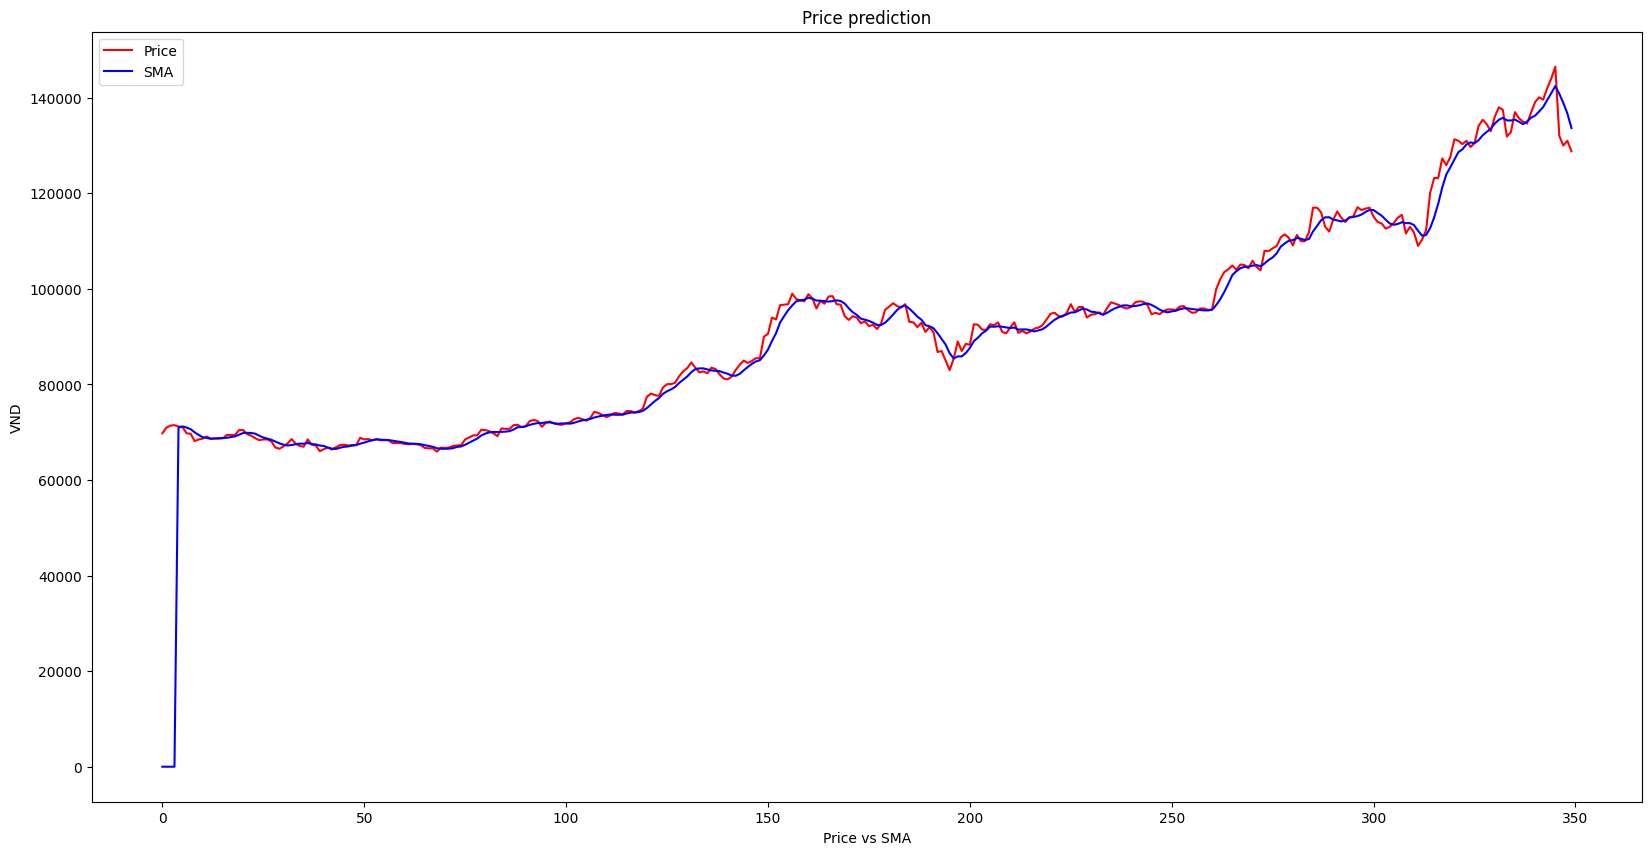

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.title("Price prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [89]:
# Mean Absolute Percentage Error
mape = abs(df["Price"] - df["SMA"])*100/df["Price"]
mape = mape.mean()
mape

2.310300160300231

# Linear Regression

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     350 non-null    int64         
 1   Date      350 non-null    datetime64[ns]
 2   Price     350 non-null    float64       
 3   Open      350 non-null    float64       
 4   High      350 non-null    float64       
 5   Low       350 non-null    float64       
 6   Vol.      350 non-null    float64       
 7   Change %  350 non-null    float64       
 8   SMA       350 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 24.7 KB


In [91]:
# Convert 'Date' column to numeric values
df['Date'] = pd.to_numeric(df['Date'])

In [92]:
df['Date'].values.reshape(-1,1)

array([[1673913600000000000],
       [1674000000000000000],
       [1674086400000000000],
       [1674777600000000000],
       [1675036800000000000],
       [1675123200000000000],
       [1675209600000000000],
       [1675296000000000000],
       [1675382400000000000],
       [1675641600000000000],
       [1675728000000000000],
       [1675814400000000000],
       [1675900800000000000],
       [1675987200000000000],
       [1676246400000000000],
       [1676332800000000000],
       [1676419200000000000],
       [1676505600000000000],
       [1676592000000000000],
       [1676851200000000000],
       [1676937600000000000],
       [1677024000000000000],
       [1677110400000000000],
       [1677196800000000000],
       [1677456000000000000],
       [1677542400000000000],
       [1677628800000000000],
       [1677715200000000000],
       [1677801600000000000],
       [1678060800000000000],
       [1678147200000000000],
       [1678233600000000000],
       [1678320000000000000],
       [16

In [93]:
# Initialize a model
lm = LinearRegression()
X = df['Date'].values.reshape(-1, 1)
Y = df['Price'].values

In [94]:
lm.fit(X, Y)

LinearRegression()

In [95]:
Y_predict = lm.predict(X)

In [96]:
df["LinearRegression"] = Y_predict

In [97]:
x = [[1673913600000000099]]
yhat = lm.predict(x)

In [98]:
yhat

array([57213.40086679])

In [99]:
df

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA,LinearRegression
0,349,1673913600000000000,69776.0,69095.0,69776.0,68925.0,1120000.0,0.0149,0.0,57213.400867
1,348,1674000000000000000,70967.0,69861.0,70967.0,69605.0,1100000.0,0.0171,0.0,57345.119229
2,347,1674086400000000000,71392.0,70626.0,71648.0,70541.0,1530000.0,0.0060,0.0,57476.837590
3,346,1674777600000000000,71477.0,71562.0,72754.0,71477.0,1310000.0,0.0012,0.0,58530.584485
4,345,1675036800000000000,71222.0,71648.0,71818.0,71222.0,1020000.0,-0.0036,70966.8,58925.739570
...,...,...,...,...,...,...,...,...,...,...
345,4,1718064000000000000,146500.0,144300.0,146500.0,143100.0,6330000.0,0.0174,142440.0,124521.483737
346,3,1718150400000000000,132000.0,127900.0,132700.0,127800.0,11220000.0,-0.0990,140820.0,124653.202099
347,2,1718236800000000000,130000.0,133700.0,133800.0,130000.0,8140000.0,-0.0152,138900.0,124784.920461
348,1,1718323200000000000,131000.0,130100.0,132600.0,129000.0,6410000.0,0.0077,136700.0,124916.638823


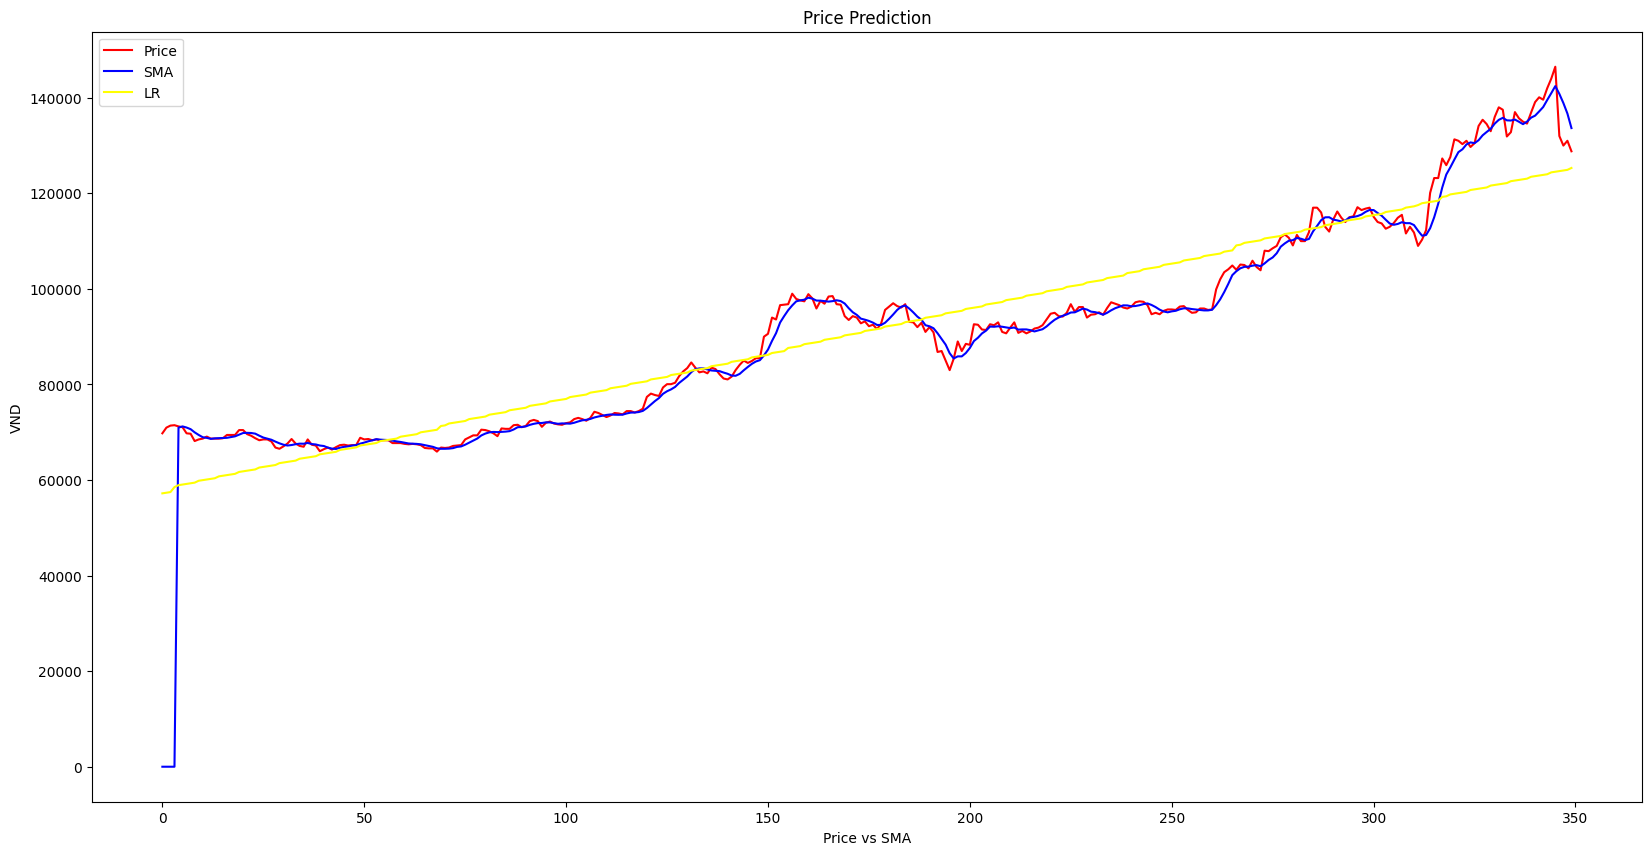

In [100]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.plot(df['LinearRegression'], color='yellow', label='LR')

plt.title("Price Prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [102]:
mse = mean_squared_error(df["Price"], Y_predict)
mae = mean_absolute_error(df["Price"], Y_predict)
mape = mean_absolute_percentage_error(df["Price"], Y_predict)

In [103]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100}%")

Mean Squared Error: 44224926.168926455
Mean Absolute Error: 5407.333157964084
Mean Absolute Percentage Error: 5.910217881910567%


# Multiple Linear Regression

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             350 non-null    int64  
 1   Date              350 non-null    int64  
 2   Price             350 non-null    float64
 3   Open              350 non-null    float64
 4   High              350 non-null    float64
 5   Low               350 non-null    float64
 6   Vol.              350 non-null    float64
 7   Change %          350 non-null    float64
 8   SMA               350 non-null    float64
 9   LinearRegression  350 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 27.5 KB


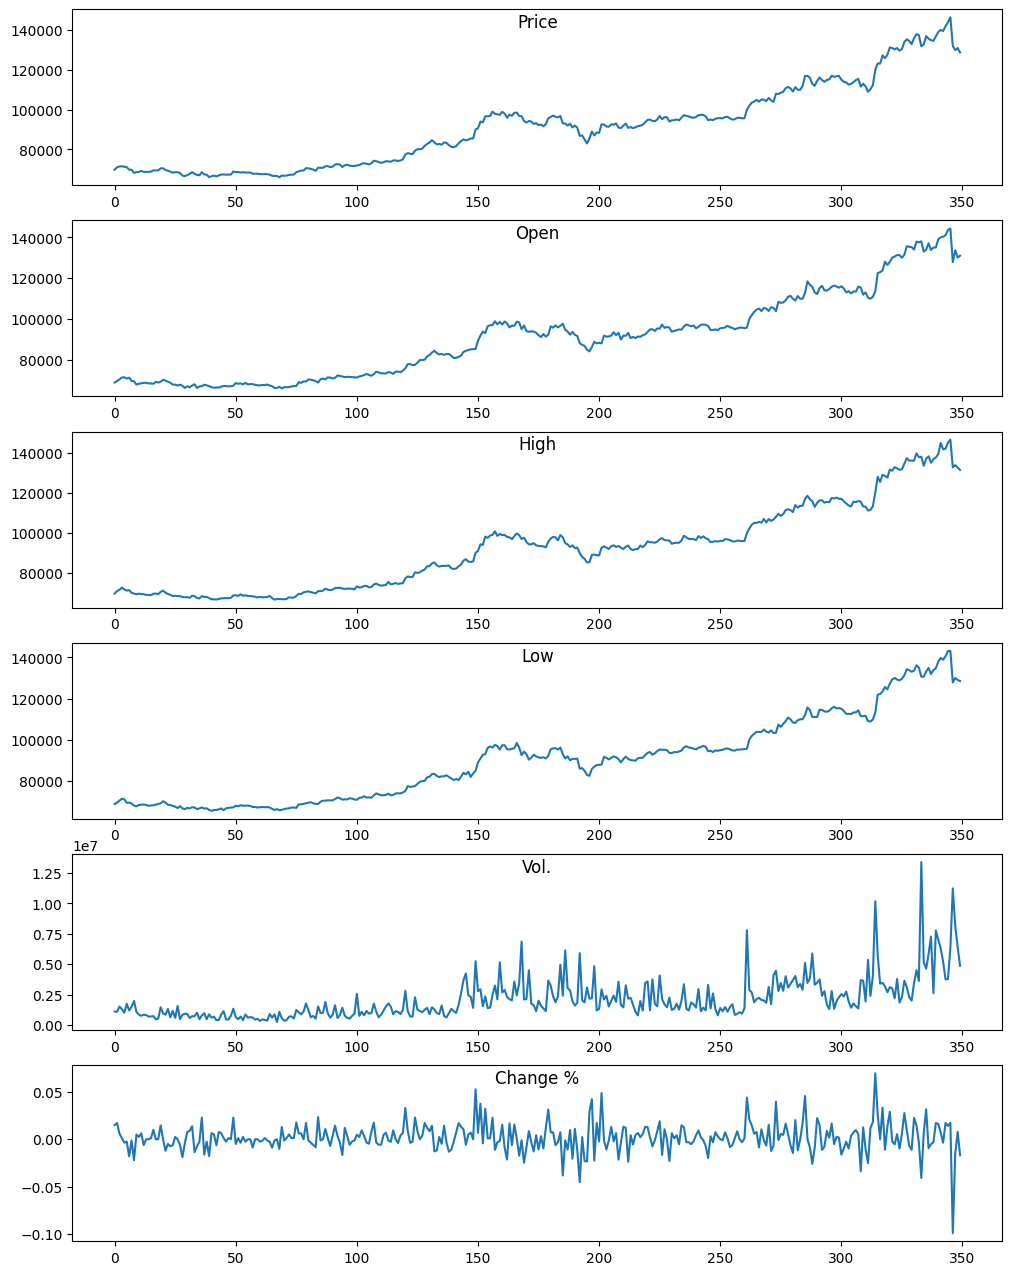

In [105]:
columns = ["Price", "Open", "High", "Low", "Vol.", "Change %"]
plt.figure(figsize = (12,16))
for i in range(len(columns)):
    plt.subplot(len(columns), 1, i+1)
    plt.plot(df[columns[i]])
    plt.title(columns[i], y=0.85, loc='center')
plt.show()

# Discuss on this, can we apply MLR?

## Create MLR model

In [106]:
# Initialize the model with Sklearn
mlr = LinearRegression()

In [107]:
# Define inputs (X) and target (Y)
input_columns = ["Open", "High", "Low", "Vol.", "Change %"]
target_column = "Price"
X = df[input_columns]
Y = df[target_column]

In [108]:
# Train the MLR model
mlr.fit(X, Y)

LinearRegression()

In [109]:
# Predict with the input_columns data
Y_predict = mlr.predict(X)

In [110]:
# Add the predict data into df, create new column named MLR
df["MLR"] = Y_predict

In [111]:
df.head()

,index,Date,Price,Open,High,Low,Vol.,Change %,SMA,LinearRegression,MLR
0,349,1673913600000000000,69776.0,69095.0,69776.0,68925.0,1120000.0,0.0149,0.0,57213.400867,69949.855502
1,348,1674000000000000000,70967.0,69861.0,70967.0,69605.0,1100000.0,0.0171,0.0,57345.119229,70902.388227
2,347,1674086400000000000,71392.0,70626.0,71648.0,70541.0,1530000.0,0.0060,0.0,57476.837590,71387.172151
3,346,1674777600000000000,71477.0,71562.0,72754.0,71477.0,1310000.0,0.0012,0.0,58530.584485,72174.299830
4,345,1675036800000000000,71222.0,71648.0,71818.0,71222.0,1020000.0,-0.0036,70966.8,58925.739570,71436.918410


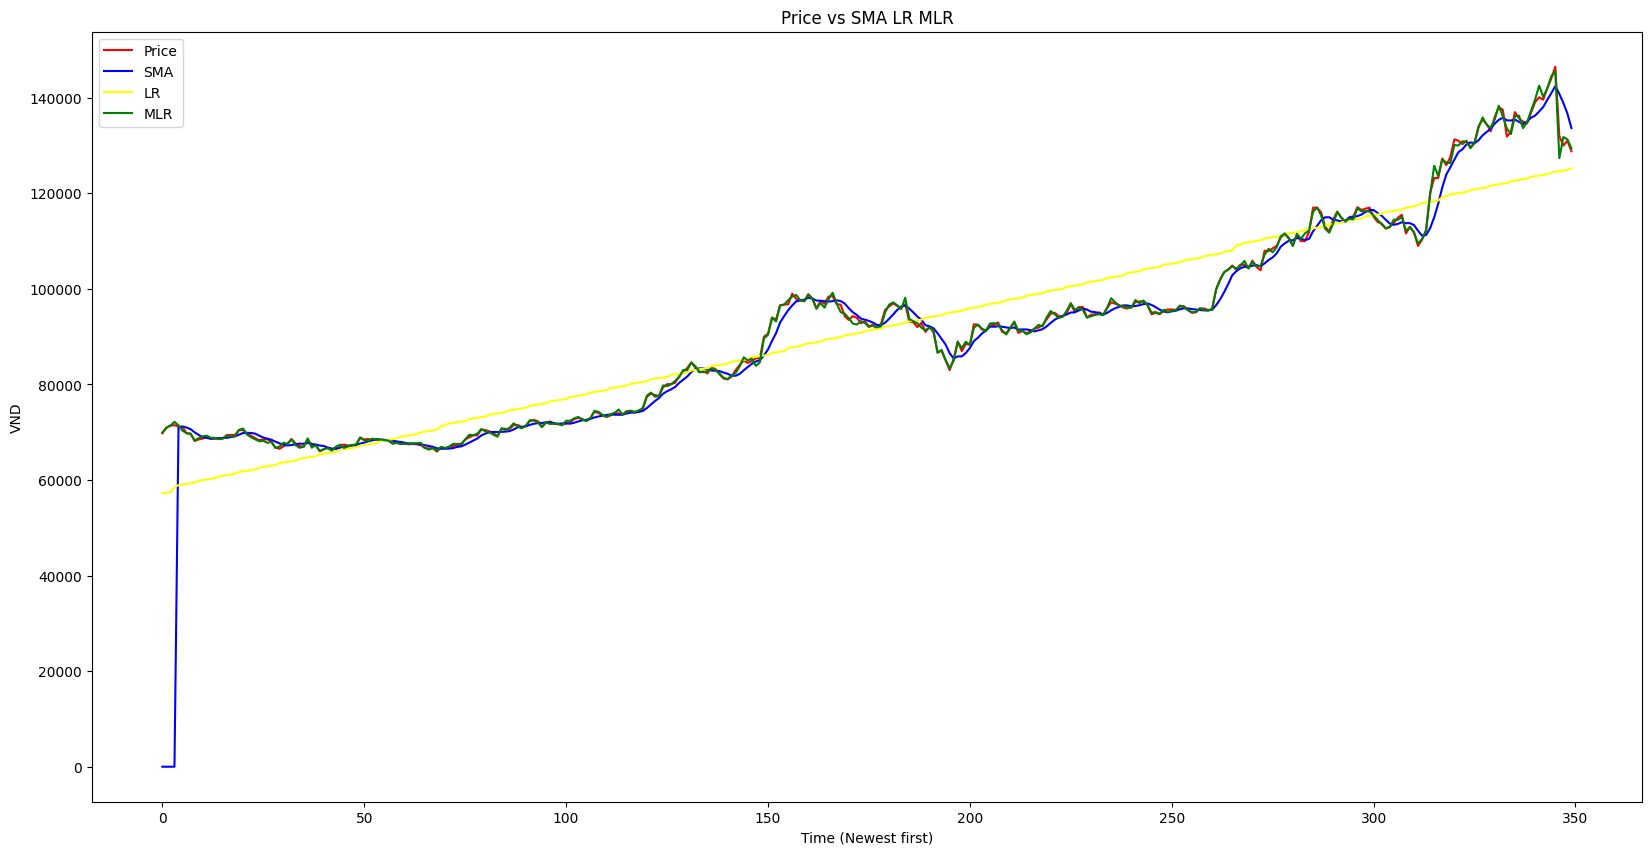

In [112]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.plot(df['LinearRegression'], color='yellow', label='LR')
plt.plot(df['MLR'], color='green', label='MLR')
plt.title("Price vs SMA LR MLR")
plt.xlabel("Time (Newest first)")
plt.ylabel("VND")
plt.legend()

In [113]:
mape = mean_absolute_percentage_error(df["Price"], df["MLR"])*100
mape

0.36749724738206885

# Train, Test and Evaluation a model

In [114]:
# Define inputs (X) and target (Y)
input_columns = ["Open", "High", "Low", "Vol.", "Change %"]
target_column = "Price"
X = df[input_columns]
Y = df[target_column]

In [115]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [116]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (280, 5)
X_test shape: (70, 5)
Y_train shape: (280,)
Y_test shape: (70,)


In [117]:
# Train with X_train, Y_train
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [118]:
Yhat_train = mlr.predict(X_train)

In [119]:
mape = mean_absolute_percentage_error(Y_train, Yhat_train)*100
mape

0.3647675724706486

In [120]:
# Predict with Test data
Yhat_test = mlr.predict(X_test)
mape_test = mean_absolute_percentage_error(Y_test, Yhat_test)*100
mape_test


0.41475388871548213

In [121]:
# Predict all data with this train and compare 
new_predict = mlr.predict(X)

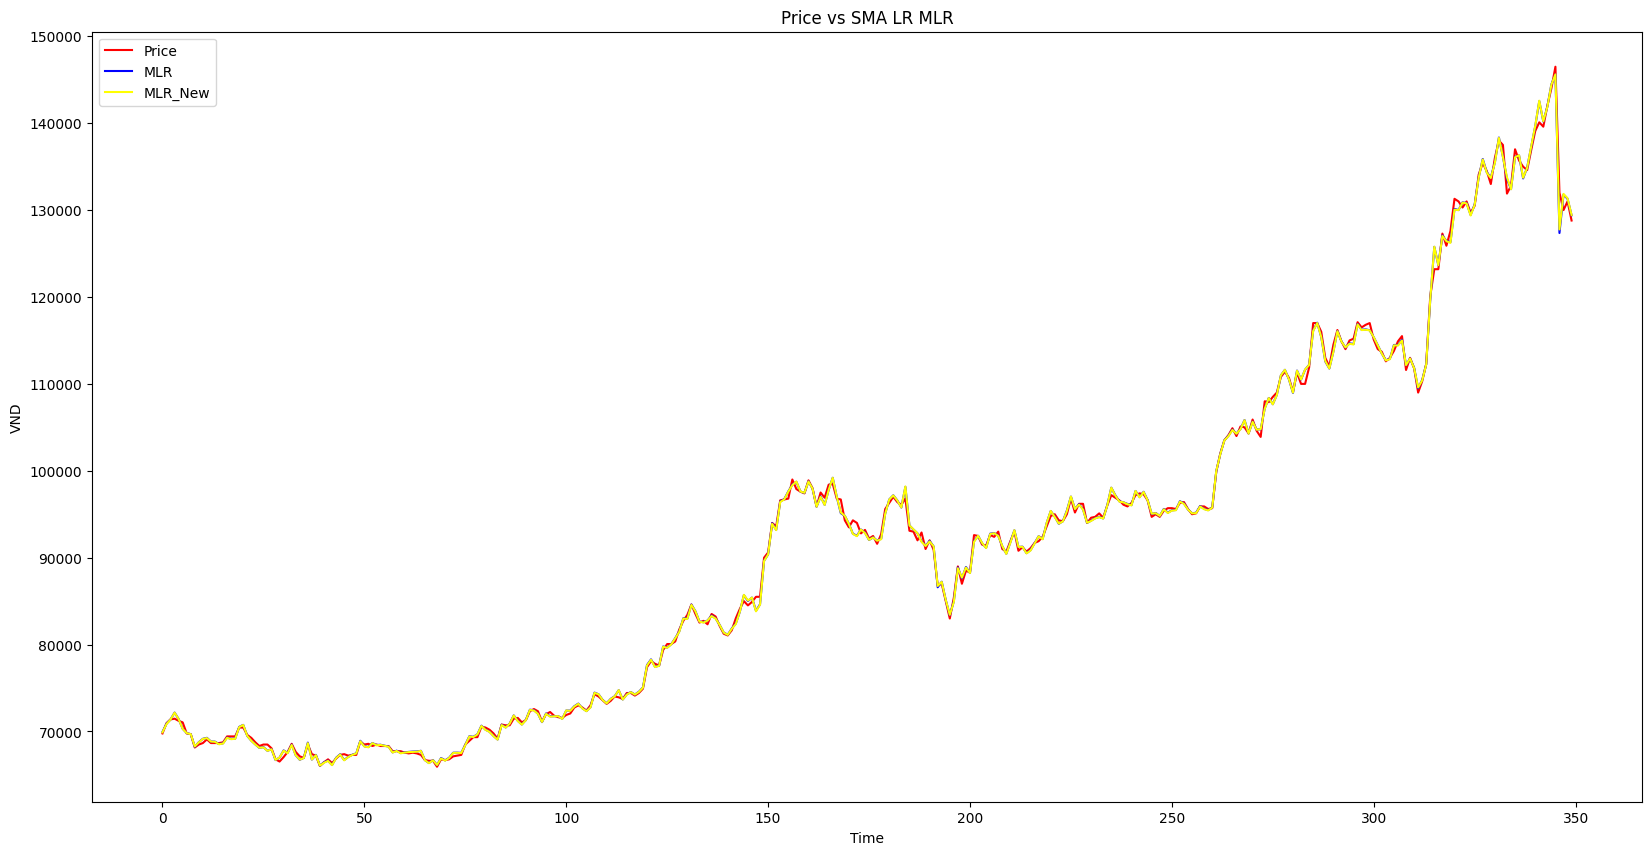

In [122]:
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['MLR'], color='blue', label='MLR')
plt.plot(new_predict, color='yellow', label='MLR_New')
plt.title("Price vs SMA LR MLR")
plt.xlabel("Time")
plt.ylabel("VND")
plt.legend()

In [123]:
# Evluate with R_squared 
# Calculate the R-squared score
from sklearn.metrics import r2_score
r_squared = r2_score(Yhat_test, Y_test)

In [124]:
print(f"R-Squared score: {r_squared}")

R-Squared score: 0.9992132771287214


# Team work in 30' (EVALUATE MODEL)

Collect FPT stock data from 18 - 20 of June \
Predict the price with your moel and compare with the real price


# Team work in 1 hour with Ridge Regression

# Decision Trees

In [125]:
# Initialize the model
from sklearn import tree
d_tree = tree.DecisionTreeRegressor()

In [126]:
# Train with X_train and Y_train above
d_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [127]:
Yhat_train = mlr.predict(X_train)
mape = mean_absolute_percentage_error(Y_train, Yhat_train)*100
print(f"Train MAPE of Decision Trees: {mape}")

Train MAPE of Decision Trees: 0.3647675724706486


In [128]:
# Test the model
Yhat_test = d_tree.predict(X_test)
mape_test = mean_absolute_percentage_error(Y_test, Yhat_test)*100
print(f"Test MAPE of Decision Trees: {mape_test}")

Test MAPE of Decision Trees: 0.899472918458371


# Team work in 1h 
## Random Forest
